In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/acme-medical-charges.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Age

In [4]:
data['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [16]:
fig = px.histogram(
    data,
    x='age',
    marginal='box',
    nbins=47,
    title='Distribution of age'
)
fig.update_layout(bargap=0.1)
fig.show()

# plt.hist(data['age'], bins=100)
# plt.show()

#### BMI

In [23]:
print(data['bmi'].describe())

fig = px.histogram(
    data,
    x='bmi',
    marginal='box',
    color_discrete_sequence=['lightblue'],
    title='Distribution of BMI'
)
fig.update_layout(bargap=0.1)
fig.show()


count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


#### Charges

In [47]:
# charges <-> smokers
fig1 = px.histogram(
    data,
    x='charges',
    marginal='box',
    color='smoker',
    color_discrete_sequence=['red', 'lightgreen'],
    title='Annual medical charges'
)

fig1.update_layout(bargap=0.2)
fig1.show()

# charges <-> sex
fig2 = px.histogram(
    data,
    x='charges',
    marginal='box',
    color='sex',
    color_discrete_sequence=['blue', 'lightgreen'],
    title='Annual medical charges'
)
fig2.update_layout(bargap=0.5)
fig2.show()

# charges <-> sex
fig3 = px.histogram(
    data,
    x='charges',
    marginal='box',
    color='region',
    color_discrete_sequence=['gray', 'orange'],
    title='Annual medical charges'
)
fig3.update_layout(bargap=0.5)
fig3.show()

#### Smokers

In [54]:
# smoker <-> sex

fig1 = px.histogram(
    data,
    x='smoker',
    color='sex',
    color_discrete_sequence=['turquoise', 'lightpink'],
    title='Smoker vs Sex'
)

fig1.update_layout(bargap=0.1)
fig1.show()

# smoker <-> region
fig2 = px.histogram(
    data,
    x='smoker',
    color='region',
    color_discrete_sequence=['turquoise', 'blue'],
    title='Smoker vs Sex'
)

fig2.update_layout(bargap=0.1)
fig2.show()


# smoker <-> children
fig3 = px.histogram(
    data,
    x='smoker',
    color='children',
    color_discrete_sequence=['lightblue', 'seagreen'],
    title='Smoker vs children'
)

fig3.update_layout(bargap=0.1)
fig3.show()

### Age and Charges

In [55]:
fig = px.scatter(
    data,
    x='age',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['sex'],
    title='Age vs Charges'
)
fig.update_traces(marker_size=5)
fig.show()

#### BMI and Charges

In [57]:
fig = px.scatter(
    data,
    x='bmi',
    y='charges',
    color='smoker',
    hover_data=['age', 'sex'],
    title='BMI vs Charges'
)
fig.update_layout(bargap=0.2)
fig.update_traces(marker_size=5)
fig.show()

In [63]:
fig = px.violin(
    data,
    x='children',
    y='charges',
    hover_data=['age', 'sex'],
    title='Children vs Charges'
)
fig.update_layout(bargap=0.2)
fig.update_traces(marker_size=5)
fig.show()

In [65]:
fig = px.violin(
    data,
    x='region',
    y='charges',
    hover_data=['age', 'sex'],
    title='Region vs Charges'
)
fig.update_layout(bargap=0.2)
fig.update_traces(marker_size=5)
fig.show()

#### Correlation of coefficients

In [82]:
print(data.info())
children_charges = data['charges'].corr(data['children'])
age_charges = data['charges'].corr(data['age'])
bmi_charges = data['charges'].corr(data['bmi'])

print(f'charges correlation with children: {children_charges}')
print(f'charges correlation with age: {age_charges}')
print(f'charges correlation with bmi: {bmi_charges}')




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
charges correlation with children: 0.0679982268479047
charges correlation with age: 0.2990081933306476
charges correlation with bmi: 0.1983409688336288


Compute correlation with categorical data

In [84]:
smokerValues = { 'no': 0, 'yes': 1 }
smokerNumeric = data['smoker'].map(smokerValues)
smoker_charges = data['charges'].corr(smokerNumeric)

sexValues = { 'female': 0, 'male': 1 }
sexNumeric = data['sex'].map(sexValues)
sex_charges = data['charges'].corr(sexNumeric)

regionValues = { 'southwest': 0, 'southeast': 1, 'northeast': 2, 'northwest': 3 }
regionNumeric = data['region'].map(regionValues)
region_charges = data['charges'].corr(regionNumeric)


print(f'charges correlation with smokers: {smoker_charges}')
print(f'charges correlation with sex: {sex_charges}')
print(f'charges correlation with region: {region_charges}')


charges correlation with smokers: 0.7872514304984785
charges correlation with sex: 0.05729206220202527
charges correlation with region: -0.011740854806590257


In [109]:
# correlation with age is 0.2990081933306476
agefig = px.scatter(
    data,
    x='age',
    y='charges',
    color='charges',
    color_discrete_sequence=['red']
)
agefig.show()

# charges correlation with bmi: 0.1983409688336288
bmifig = px.scatter(
    data,
    x='bmi',
    y='charges',
    opacity=0.6,
    color_discrete_sequence=['black']
)
bmifig.show()

# charges correlation with children: 0.0679982268479047
childfig = px.scatter(
    data,
    x='children',
    y='charges',
    opacity=0.6,
    color='children',
    color_discrete_sequence=['green']
)
childfig.show()

# charges correlation with smokers: 0.7872514304984785
smokerfig = px.histogram(
    data,
    x='smoker',
    y='charges',
    opacity=0.6,
    color='children',
    color_discrete_sequence=['green', 'red']
)
smokerfig.show()




#### all correlation between datas

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Text(0.5, 1.0, 'Correlation matrix')

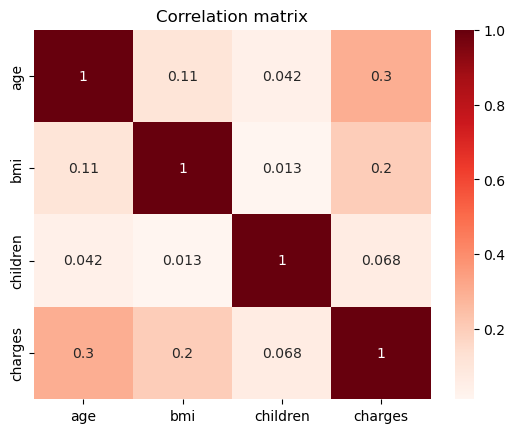

In [120]:
all_corr = data[['age', 'bmi', 'children', 'charges']].corr(method='pearson')
print(all_corr)
# headmap
sns.heatmap(all_corr, cmap='Reds', annot=True)
plt.title('Correlation matrix')